In [1]:
from aedesUFJF.Model import aedesmodel
from aedesUFJF.Forecast import forecast
from aedesUFJF.GetData import getData
from aedesUFJF.Clustering import clustering
from aedesUFJF.Plot import plot
import pandas as pd
import os

Hello world !


In [2]:
def read_file(File=None):
    
    try:
        
        _DATA = pd.read_csv(File, sep=";")
        return _DATA
    
    except:
        print("File not found.")
        return None

In [3]:
os.mkdir("output")

In [4]:
forecast_ = forecast()

In [5]:
getData_ = getData()

In [6]:
points = getData_.get_points()

In [7]:
file_name = "./data/st_luzia_itanhy.csv"
DATA1 = read_file(file_name)

In [8]:
Dict_ = DATA1.to_dict()

In [9]:
Dict_updated = getData_.update_dict(Dict1=Dict_, Dict2=points)

In [10]:
len(Dict_updated["Latitude"].keys())

2173

In [11]:
DATA= pd.DataFrame(Dict_updated)

In [12]:
temperature, humidity, precipitation, days = forecast_.getWeatherForecast()

In [13]:
model = aedesmodel()
 
n_stages = DATA[['N egg', 'N larvae', 'N pupae', 'N adults']].to_numpy()    

model.create_aedespopulation(n_stages=n_stages)

coords = DATA[["Latitude", "Longitude"]].to_numpy()
model.create_hotspot_connections(coords=coords)

containers = DATA[['A1', 'A2','B','C','D1', 'D2','E']].to_numpy()
model.containers_distribution(containers=containers)

model.define_local(country_bias="Brazil", pronvice_bias="SE")    

model.local_weatherForecast(temperature=temperature, humidity=humidity, precipitation=precipitation) 


Run --> 0
Run --> 1
Run --> 2
Run --> 3
Run --> 4
Run --> 5
Run --> 6


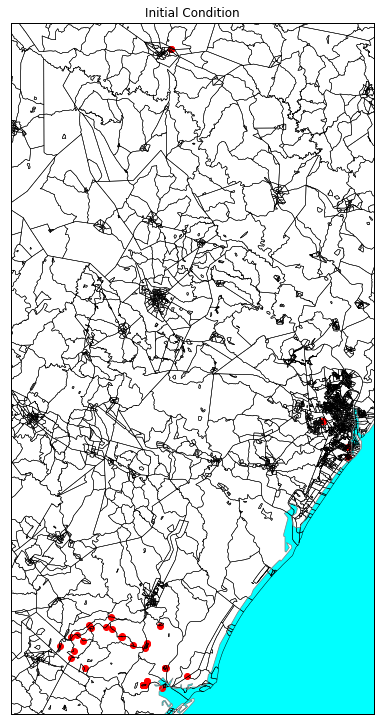

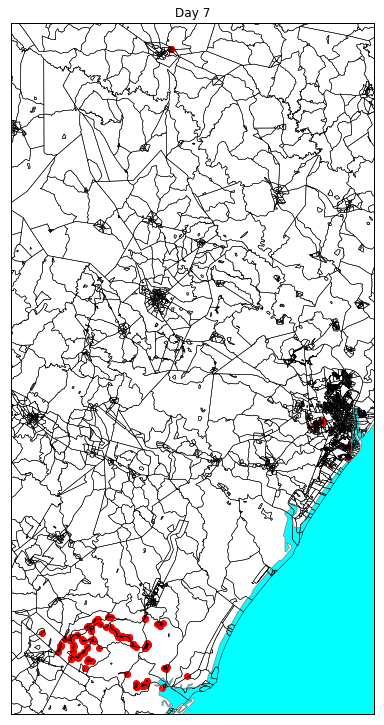

In [14]:
 eggperpoint, larvaeperpoint, pupaeperpoint, adultsperpoint, prob_risk, edges = model.run_(nruns=days, output_path="./output/")

In [15]:
immature = []
#immature.extend([i for i in eggperpoint.keys() if eggperpoint[i]>0])
immature.extend([i for i in larvaeperpoint.keys() if larvaeperpoint[i]>0])
immature.extend([i for i in pupaeperpoint.keys() if pupaeperpoint[i]>0])
#adults = [i for i in adultsperpoint.keys() if adultsperpoint[i]>0]

point = []
point.extend(immature)
#point.extend(adults)

print("Total de pontos com alguma forma do vetor: {}".format(len(set(point))))

Total de pontos com alguma forma do vetor: 133


In [16]:
clustering_ = clustering()

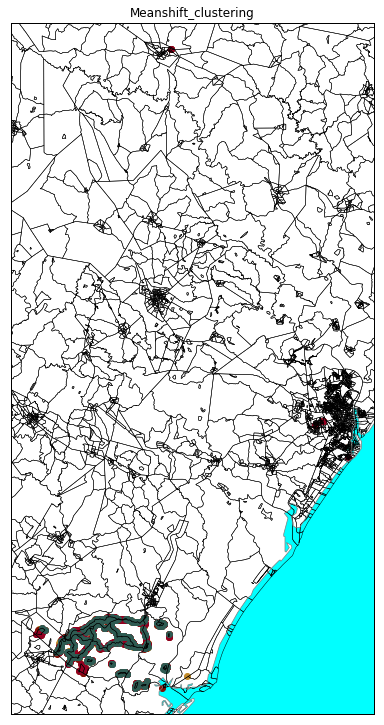

In [17]:
clustering_.ClusteringHotSpot(data=containers, algorithm="Meanshift", pca="Yes")
clustering_.plot_gmap(coords=coords, title="Meanshift_clustering", output_path="./output/")
clustering_.plot_shapefile(coords=coords, title="Meanshift_clustering", output_path="./output/", country_bias="Brazil", pronvice_bias="SE")